# Summary

1. [Librairies](#Librairies)
2. [Data](#Data)
3. [Data Study](#Data-Study)
4. [Text Preprocessing](#Text-Preprocessing)
5. [Model](#Model)

# Librairies

In [7]:
# Import classical libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import AI related libraires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.preprocessing.text import Tokenizer
# Import f1 score from tfa
import tensorflow_addons as tfa

# Import nltk for text processing
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanguy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tanguy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data

In [10]:
# Load the data
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# Only keep the first 5000 rows
train = train[:5000]

# Print train
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# Data Study

In [11]:
# Display the number of summed up values for the columns 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()


toxic            503
severe_toxic      51
obscene          270
threat            20
insult           271
identity_hate     49
dtype: int64

In [12]:
for column in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    # Select a random comment for the column
    sample = train[train[column] == 1]['comment_text'].sample(1)
    print(f"Commentaire pour la colonne {column} :")
    print(sample)
    print()

Commentaire pour la colonne toxic :
3185    moderator on wikipedia \r\n\r\nmoderator on wi...
Name: comment_text, dtype: object

Commentaire pour la colonne severe_toxic :
1465    To Blanchardb \r\n\r\nYou dumb motherfucker I ...
Name: comment_text, dtype: object

Commentaire pour la colonne obscene :
4544    listen dumbass i did`nt do any anything to the...
Name: comment_text, dtype: object

Commentaire pour la colonne threat :
600    I'm also a sock puppet of this account...SUPRI...
Name: comment_text, dtype: object

Commentaire pour la colonne insult :
2564    .When I am providing with reliable source wher...
Name: comment_text, dtype: object

Commentaire pour la colonne identity_hate :
1654    "\r\n\r\nYou have evidence from ME!  I present...
Name: comment_text, dtype: object



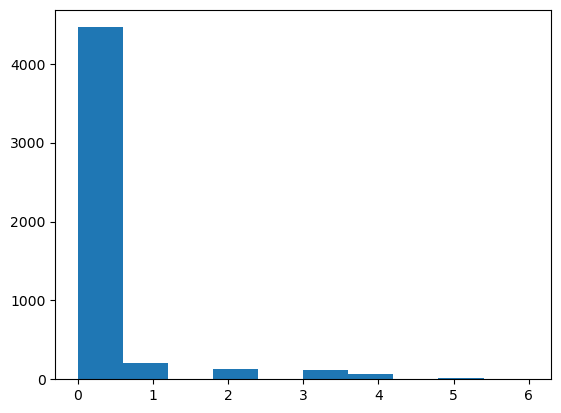

In [13]:
# Create a new array that for each comment contains the values of the columns 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
labels = train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# For each, sum the values of the columns
labels = np.sum(labels, axis=1)

# Plots with the different values with x as the number of occurences and y as the number of comments
plt.hist(labels)
plt.show()

# Text Preprocessing

In [14]:
# Lowercase the text
train['comment_text'] = train['comment_text'].str.lower()

# Print train
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation\r\nwhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nmore\r\ni can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


In [15]:
# Tokenize the text
tokenizer = nltk.RegexpTokenizer(r'\w+')
train['comment_text'] = train['comment_text'].apply(tokenizer.tokenize)

# Print train
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, why, the, edits, made, under, my...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[d, aww, he, matches, this, background, colour...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, man, i, m, really, not, trying, to, edit...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[more, i, can, t, make, any, real, suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"[you, sir, are, my, hero, any, chance, you, re...",0,0,0,0,0,0


In [16]:
# Stopwords filtering
stopwords = nltk.corpus.stopwords.words()
train['comment_text'] = train['comment_text'].apply(lambda x: [word for word in x if word not in stopwords])

# Print train
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[aww, matches, background, colour, seemingly, ...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, edit, guy, constantly, removing, relevan...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[make, real, suggestions, improvement, wondere...",0,0,0,0,0,0
4,0001d958c54c6e35,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [17]:
# Lemmatization
Word_Lemmatizer = WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: [Word_Lemmatizer.lemmatize(word) for word in x])

# Print train
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[aww, match, background, colour, seemingly, st...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, edit, guy, constantly, removing, relevan...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[make, real, suggestion, improvement, wondered...",0,0,0,0,0,0
4,0001d958c54c6e35,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [18]:
sentences = list(map(lambda x : " ".join(x), train['comment_text']))

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)

sequences = tokenizer.texts_to_sequences(sentences)
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

In [19]:
test_portion = 0.1
labels = np.array(train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']])
training_size = len(padded)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [20]:
# Vocabulary
vocabulary = set()
for sentence in train['comment_text']:
    for word in sentence:
        vocabulary.add(word)

print(len(vocabulary))

21614


In [21]:
# Bag of words
bag_of_words = {}
for word in vocabulary:
    bag_of_words[word] = 0

# Count the number of words
for sentence in train['comment_text']:
    for word in sentence:
        bag_of_words[word] += 1

# Print the 10 most common words
print(sorted(bag_of_words.items(), key=lambda x: x[1], reverse=True)[:10])

[('article', 2267), ('page', 1831), ('wikipedia', 1418), ('talk', 1114), ('as', 726), ('source', 718), ('user', 649), ('time', 594), ('edit', 578), ('make', 520)]


# Model

In [29]:
# The first model will use count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer
vectorizer.fit(sentences)

# Transform the sentences
X = vectorizer.transform(sentences)

# Print the shape of X
print(X.shape)

# Split the data
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Print the shape of X_train
print(X_train.shape)

(5000, 21278)
(4000, 21278)


In [31]:
# Create a first model to predict the toxicity of a comment
embedding_dim = 100
max_length = 200
embeddings_matrix = np.zeros((len(vocabulary)+1, embedding_dim))

model = Sequential([
    Embedding(len(vocabulary)+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    LSTM(units=64),
    Dense(6, activation='sigmoid')
])

# Print the model summary
model.summary()

# F1 score callback
f1_score = tfa.metrics.F1Score(num_classes=6, threshold=0.5)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1_score])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          2161500   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,204,130
Trainable params: 42,630
Non-trainable params: 2,161,500
_________________________________________________________________


In [32]:
num_epochs = 3

# Fit the model
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels),batch_size=32)

Epoch 1/3
141/141 [==============================] - 23s 136ms/step - loss: 0.3541 - accuracy: 0.8016 - f1_score: 0.0000e+00 - val_loss: 0.3472 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/3
141/141 [==============================] - 19s 133ms/step - loss: 0.3470 - accuracy: 0.8160 - f1_score: 0.0000e+00 - val_loss: 0.3400 - val_accuracy: 0.9980 - val_f1_score: 0.0000e+00
Epoch 3/3
141/141 [==============================] - 18s 129ms/step - loss: 0.3452 - accuracy: 0.9924 - f1_score: 0.0000e+00 - val_loss: 0.3383 - val_accuracy: 0.9980 - val_f1_score: 0.0000e+00


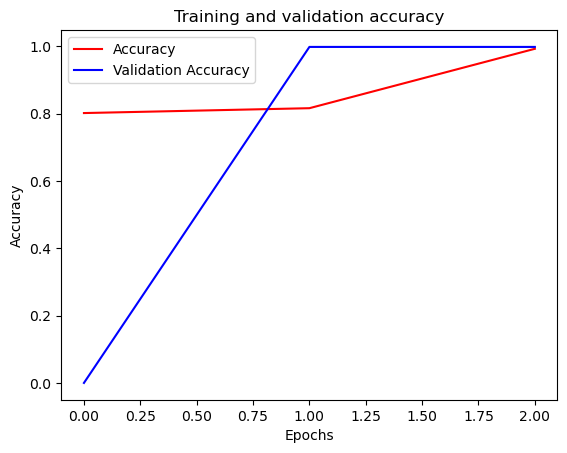

<Figure size 640x480 with 0 Axes>

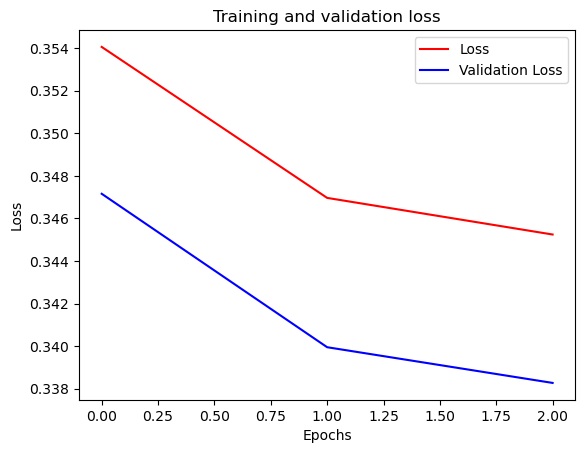

<Figure size 640x480 with 0 Axes>

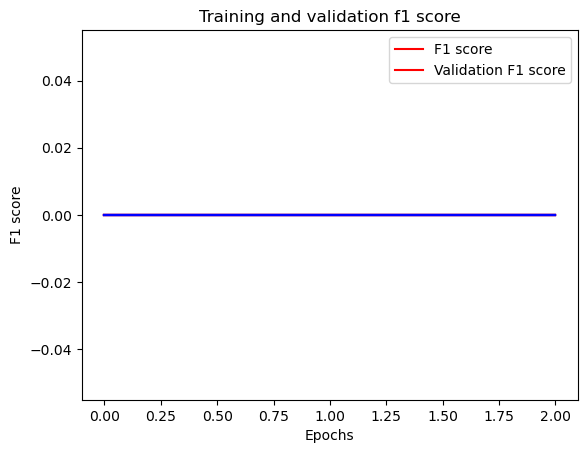

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
f1_score = history.history['f1_score']
val_f1_score = history.history['val_f1_score']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()
plt.show()

#------------------------------------------------
# Plot training and validation f1 score per epoch
#------------------------------------------------
plt.plot(epochs, f1_score, 'r')
plt.plot(epochs, val_f1_score, 'b')
plt.title('Training and validation f1 score')
plt.xlabel("Epochs")
plt.ylabel("F1 score")
plt.legend(["F1 score", "Validation F1 score"])

plt.figure()
plt.show()